In [44]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df=pd.read_csv('Vic_petition_data.csv',encoding="utf-8")

In [7]:
df1=df.loc[df.No_Supporters_log>=5]
df1.shape

(521, 18)

In [8]:
df2=df.loc[df.No_Supporters_log<5]
df2.shape

(3131, 18)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
x1, y1 = (df1[['Title', 'Text','Title_str_len' ,
       'start_time', 'Text_len_p1','Text_len_p2', 'Title_len', 'Text_str_len','Image','Tweet']], 
         df1.No_Supporters_log)
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1, test_size=0.25, random_state=42)

x2, y2 = (df2[['Title', 'Text','Title_str_len' ,
       'start_time', 'Text_len_p1','Text_len_p2', 'Title_len', 'Text_str_len','Image','Tweet']], 
         df2.No_Supporters_log)
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.25, random_state=42)

In [29]:
x1_train.shape

(390, 10)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

text_court_vectorizer1 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 2),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500) 
text_court_vectorizer2 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 2),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500) 

In [11]:

train_text_features1 = text_court_vectorizer1.fit_transform((x1_train.Text).values.astype('U'))
train_text_features1 = train_text_features1.toarray()
test_text_features1 = text_court_vectorizer1.transform((x1_test.Text).values.astype('U'))
test_text_features1 = test_text_features1.toarray()
train_text_features2 = text_court_vectorizer2.fit_transform((x2_train.Text).values.astype('U'))
train_text_features2 = train_text_features2.toarray()
test_text_features2 = text_court_vectorizer2.transform((x2_test.Text).values.astype('U'))
test_text_features2 = test_text_features2.toarray()

# import pickle
# pickle.dump(text_court_vectorizer,open('text_court_vectorizer_v2.pickle','wb'))

In [27]:
train_text_features1.shape

(390, 2500)

In [29]:

# train_text_idf_features = text_idf_transformer.fit_transform(train_text_features)
# train_text_idf_features=train_text_idf_features.toarray()
# test_text_idf_features = text_idf_transformer.transform(test_text_features)
# test_text_idf_features=test_text_idf_features.toarray()

In [28]:
#text_court_vectorizer.vocabulary_

In [12]:
title_court_vectorizer1 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 3),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500) 
title_court_vectorizer2 = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 3),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500) 

In [14]:
train_title_features1 = title_court_vectorizer1.fit_transform((x1_train.Title).values.astype('U'))
train_title_features1 = train_title_features1.toarray()
test_title_features1 = title_court_vectorizer1.transform((x1_test.Title).values.astype('U'))
test_title_features1 = test_title_features1.toarray()

train_title_features2 = title_court_vectorizer2.fit_transform((x2_train.Title).values.astype('U'))
train_title_features2 = train_title_features2.toarray()
test_title_features2 = title_court_vectorizer2.transform((x2_test.Title).values.astype('U'))
test_title_features2 = test_title_features2.toarray()

#import pickle
# pickle.dump(title_court_vectorizer,open('title_court_vectorizer_v2.pickle','wb'))

In [27]:
# train_title_idf_features = title_idf_transformer.fit_transform(train_title_features)
# train_title_idf_features=train_title_idf_features.toarray()
# test_title_idf_features = title_idf_transformer.transform(test_title_features)
# test_title_idf_features=test_title_idf_features.toarray()

In [47]:
from sklearn.preprocessing import StandardScaler
#model_tSNE_all = TSNE(n_components=2, random_state=0)
total_scale_train1=StandardScaler().fit(np.concatenate((train_text_features1,
                                                     train_title_features1,x1_train[['Title_str_len', 'Text_len_p1', 'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

total_train_scale1=total_scale_train1.transform(np.concatenate((train_text_features1,
                                                     train_title_features1,x1_train[[
                                                         'Title_str_len', 'Text_len_p1',
                                                         'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))


total_test_scale1=total_scale_train1.transform(np.concatenate((test_text_features1,
                                                             test_title_features1, 
                                                x1_test[['Title_str_len', 'Text_len_p1',
                                                        'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

from sklearn.decomposition import PCA
train_pca1=PCA(n_components=1500, svd_solver='full')

train_pca1.fit(total_train_scale1)

x_train_pca1=train_pca1.fit_transform(total_train_scale1)

x_test_pca1=train_pca1.transform(total_test_scale1)



In [54]:
total_scale_train2=StandardScaler().fit(np.concatenate((train_text_features2,
                                                     train_title_features2,x2_train[['Title_str_len', 'Text_len_p1', 'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

total_train_scale2=total_scale_train2.transform(np.concatenate((train_text_features2,
                                                     train_title_features2,x2_train[[
                                                         'Title_str_len', 'Text_len_p1',
                                                         'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))


total_test_scale2=total_scale_train2.transform(np.concatenate((test_text_features2,
                                                             test_title_features2, 
                                                x2_test[['Title_str_len', 'Text_len_p1',
                                                        'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

from sklearn.decomposition import PCA
train_pca2=PCA(n_components=1500,svd_solver='full')

x_train_pca2=train_pca2.fit_transform(total_train_scale2)

x_test_pca2=train_pca2.transform(total_test_scale2)

In [53]:
x_train_pca2.shape

(2348, 2348)

In [30]:
# from sklearn.preprocessing import StandardScaler
# #model_tSNE_all = TSNE(n_components=2, random_state=0)
# total_scale_train=StandardScaler().fit(np.concatenate((train_text_idf_features,
#                                                      train_title_idf_features,x_train[['Title_str_len', 'Text_len_p1', 'Text_len_p2',
#                                       'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

# total_train_scale=total_scale_train.transform(np.concatenate((train_text_idf_features,
#                                                      train_title_idf_features,x_train[[
#                                                          'Title_str_len', 'Text_len_p1',
#                                                          'Text_len_p2',
#                                       'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))


# total_test_scale=total_scale_train.transform(np.concatenate((test_text_idf_features,
#                                                              test_title_idf_features, 
#                                                 x_test[['Title_str_len', 'Text_len_p1',
#                                                         'Text_len_p2',
#                                       'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

# from sklearn.decomposition import PCA
# train_pca=PCA(n_components=1500,svd_solver='full')

# x_train_pca=train_pca.fit_transform(total_train_scale)

# x_test_pca=train_pca.transform(total_test_scale)



In [96]:
import pickle
pickle.dump(total_scale_train,open('total_scale_train_v2.pickle','wb'))
pickle.dump(train_pca,open('train_pca.pickle_v2','wb'))

In [18]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [61]:
Elastic1 = linear_model.ElasticNet()
pca1 = decomposition.PCA()
pipe1 = Pipeline(steps=[
    ('pca1', pca1), 
                       ('Elastic1', Elastic1)])

n_components1 = [ 60,100,200,300]
alphas1 = np.logspace(-4, 4, 4)
l1_ratio1=( 0.2,0.4,0.6,0.7,0.8,1)

estimator1 = GridSearchCV(pipe1,
                         dict(pca1__n_components=n_components1,
                              Elastic1__alpha=alphas1,Elastic1__l1_ratio=l1_ratio1))



In [63]:
Elastic2 = linear_model.ElasticNet()
pca2 = decomposition.PCA()
pipe2 = Pipeline(steps=[
    ('pca2', pca2), 
                       ('Elastic2', Elastic2)])

n_components2 = [ 60,100,500,750, 1000]
alphas2 = np.logspace(-4, 4, 4)
l1_ratio2=( 0.2,0.4,0.6,0.7,0.8,1)

estimator2 = GridSearchCV(pipe2,
                         dict(pca2__n_components=n_components2,
                              Elastic2__alpha=alphas2,Elastic2__l1_ratio=l1_ratio2))



In [62]:
estimator1.fit(x_train_pca1, y1_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca1', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Elastic1', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca1__n_components': [60, 100, 200, 300], 'Elastic1__alpha': array([  1.00000e-04,   4.64159e-02,   2.15443e+01,   1.00000e+04]), 'Elastic1__l1_ratio': (0.2, 0.4, 0.6, 0.7, 0.8, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [64]:
estimator2.fit(x_train_pca2, y2_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca2', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Elastic2', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca2__n_components': [60, 100, 500, 750, 1000], 'Elastic2__alpha': array([  1.00000e-04,   4.64159e-02,   2.15443e+01,   1.00000e+04]), 'Elastic2__l1_ratio': (0.2, 0.4, 0.6, 0.7, 0.8, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
n_comp1=estimator1.best_estimator_.named_steps['pca1'].n_components
alpha1=estimator1.best_estimator_.named_steps['Elastic1'].alpha
l1_1=estimator1.best_estimator_.named_steps['Elastic1'].l1_ratio


print(n_comp1,alpha1,l1_1)


200 0.0001 0.2


In [68]:
n_comp2=estimator2.best_estimator_.named_steps['pca2'].n_components
alpha2=estimator2.best_estimator_.named_steps['Elastic2'].alpha
l1_2=estimator2.best_estimator_.named_steps['Elastic2'].l1_ratio


print(n_comp2,alpha2,l1_2)

1000 0.0464158883361 0.6


In [69]:
Elastic1=linear_model.ElasticNet(alpha=alpha1, 
                    l1_ratio=l1_1, fit_intercept=True, 
            normalize=False, precompute=False, max_iter=1000, 
           copy_X=True, tol=0.0001, warm_start=False, positive=False, 
           random_state=None, selection='cyclic')

In [70]:
Elastic2=linear_model.ElasticNet(alpha=alpha2, 
                    l1_ratio=l1_2, fit_intercept=True, 
            normalize=False, precompute=False, max_iter=1000, 
           copy_X=True, tol=0.0001, warm_start=False, positive=False, 
           random_state=None, selection='cyclic')

In [72]:
train_Elastic1=Elastic1.fit(x_train_pca1[:,0:n_comp1],y1_train)

In [74]:
train_Elastic2=Elastic2.fit(x_train_pca2[:,0:n_comp2],y2_train)

In [95]:
# import pickle
# pickle.dump(train_Elastic,open('train_Elastic_v2.pickle','wb'))

In [75]:
train_predict1=train_Elastic1.predict(x_train_pca1[:,0:n_comp1])

In [76]:
train_predict2=train_Elastic2.predict(x_train_pca2[:,0:n_comp2])

In [78]:
from sklearn.metrics import mean_squared_error
MSE_train1=mean_squared_error(y1_train, train_predict1);MSE_train1

0.087167832804372472

In [79]:
MSE_train2=mean_squared_error(y2_train, train_predict2);MSE_train2

0.36895017184637985

In [100]:
np.concatenate((y2_train,y1_train),axis=0)

array([ 2.49136169,  3.78318869,  3.2278867 , ...,  5.75423363,
        5.18089969,  6.19276532])

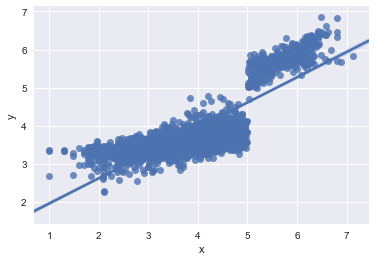

In [101]:
sns.regplot(x='x',y='y',data=pd.DataFrame({'x':np.concatenate((y2_train,y1_train),axis=0),'y':np.concatenate((train_predict2,train_predict1),axis=0)}))

In [82]:
test_predict1=train_Elastic1.predict(x_test_pca1[:,0:n_comp1])


In [80]:
test_predict2=train_Elastic2.predict(x_test_pca2[:,0:n_comp2])


In [83]:
MSE_test1=mean_squared_error(y1_test, test_predict1); MSE_test1

0.22983280843728177

In [84]:
MSE_test2=mean_squared_error(y2_test, test_predict2); MSE_test2

0.48611940755547223

In [86]:
from sklearn.metrics import r2_score
r2_score(y1_test, test_predict1)

0.13726508266397341

In [87]:
r2_score(y2_test, test_predict2)

0.092931481298614171

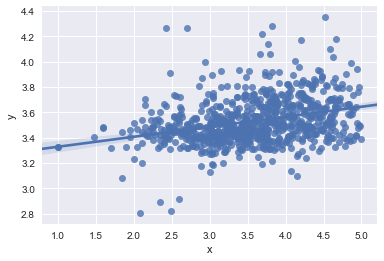

In [93]:
import seaborn as sns
sns.regplot(x='x',y='y',data=pd.DataFrame({'x':y2_test,'y':test_predict2}))

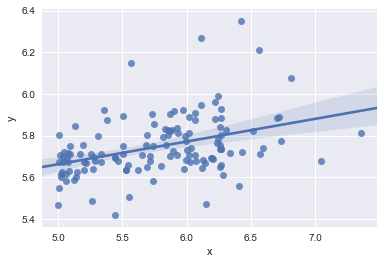

In [94]:
sns.regplot(x='x',y='y',data=pd.DataFrame({'x':y1_test,'y':test_predict1}))

In [1]:
print(np.mean(test_predict), np.mean(y_test))

NameError: name 'np' is not defined